# Find out the best tariff plan
(statistical data analysis)

## Content
1. [Introduction](#intro)
2. [General Information of Datasets:](#general)
    - [Open Files](#open)
    - [Dataset 'Calls'](#calls)
    - [Dataset 'Internet'](#internet)
    - [Dataset 'Messages'](#messages)
    - [Dataset 'Users'](#users)
    - [Conclusion](#general_conclusion)
3. [Preprocessing data](#"prep_data)
    - [Calls, Messages Traffic by month](#by_month)
    - [Monthly profit by user](#"monthly_profit")
    - [Conclusion](#prep_conclusion)
4. [Analyse the data](#"analyse_data")
    - [Difference between tariffs' income]("tariffs_income")
    - [Difference between Moscow and other cities](#"moscow_otheer")
    - [Standard Deviation and Variance ](#"stantard_dev")
    - [Probability](#"prob")
5. [Conclusion](#conclusion)

## Introduction <a id = "intro"></a>


**Project Description**


 "Megaline" offers its clients two prepaid plans, "Smart" and "Ultra". The commercial department would like to know which of the plans is more profitable in order to adjust the advertising budget.

 You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 "Megaline" clients, specifically, who the clients are, where they are from, which plan they use, the number of calls made and SMS they sent in 2018. You have to analyse clients' behavior and work out the most profitable prepaid plan.

<strong>Prepaid plans description:</strong>

<i>Smart</i><br>
1. Monthly charge: 550 rubles<br>
2. 500 monthly minutes, 50 SMS and 15 GB of web traffic
3. After exceeding the package limits: 1. 1 minute:<br>
    - 1 minute: 3 rubles ;
    - SMS: 3 rubles;
    - 1 GB of web traffic: 200 rubles.

<i>Ultra</i><br>

1. Monthly charge: 1950 rubles
2. 3000 monthly minutes, 1000 SMS and 30 GB of web traffic
3. After exceeding the package limits:
    - 1 minute: 1 ruble;
    - SMS: 1 ruble;
    - 1 GB of web traffic: 150 rubles.

<b>NB: "Megaline" always rounds up the minute and megabyte values. If the call lasted just one second, it will be counted as one minute.</b>

We are provided with five files:
- calls.csv
- internet.csv
- messages.csv
- tariffs.csv
- users.csv

**Data Description**

1. The users table (data on users):
    - user_id — unique user identifier
    - first_name — user's name
    - last_name — user's last name
    - age — user's age (years)
    - reg_date — subscription date (dd, mm, yy)
    - churn_date — the date of use discontinue (if the value is missed, the calling plan was used at the moment of data extraction)
    - city — user's city of residence
    - tarif — calling plan name

2. The calls table (data on calls):
    - id — unique call identifier
    - call_date — call date
    - duration — call duration in minutes
    - user_id — the identifier of the user making a call

3. The messages table (data on SMS):
    - id — unique SMS identifier
    - message_date — SMS date
    -user_id — the identifier of the user sending an SMS

4. The internet table (data on web sessions):
    - id — unique session id
    - mb_used — the volume of web traffic spent during a session (in megabytes)
    - session_date — web session date
    - user_id — user identifier

5. The tariffs table (data on the plans):
    - tariff_name — calling plan name
    - rub_monthly_fee — monthly charge in rubles
    - minutes_included — monthly minutes within package limits
    - messages_included — monthly SMS within package limits
    - mb_per_month_included — web traffic volume within package limits (in megabytes)
    - rub_per_minute — the price per minute after exceeding the package limits (e.g., if the package included 100 minutes, the 101st minute will be charged)
    - rub_per_message — the price per SMS after exceeding the package limits
    - rub_per_gb — the price per extra gigabyte of web traffic after exceeding the package limits (1 GB = 1024 megabytes)

## General Information <a hfer = "general"></a>

### Open files and get first information about data<a href = "open"></a>

*Libraries*

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

In [3]:
try:
    telecom_calls = pd.read_csv('calls.csv')
    telecom_internet = pd.read_csv('internet.csv')
    telecom_messages = pd.read_csv('messages.csv')
    telecom_tariffs = pd.read_csv('tariffs.csv')
    telecom_users = pd.read_csv('users.csv')

except:
    telecom_calls = pd.read_csv('/datasets/calls.csv')
    telecom_internet = pd.read_csv('/datasets/internet.csv')
    telecom_messages = pd.read_csv('/datasets/messages.csv')
    telecom_tariffs = pd.read_csv('/datasets/tariffs.csv')
    telecom_users = pd.read_csv('/datasets/users.csv')

In [4]:
telecom_calls.sample(10)

,id,call_date,duration,user_id
134685,1344_502,2018-09-03,16.46,1344
104709,1268_271,2018-09-19,2.81,1268
67955,1172_160,2018-12-06,7.63,1172
32672,1080_467,2018-10-08,2.73,1080
47787,1119_176,2018-05-27,1.54,1119
142383,1360_826,2018-08-23,6.44,1360
49351,1123_370,2018-11-04,7.15,1123
144386,1364_98,2018-11-20,14.04,1364
188521,1465_238,2018-08-24,0.00,1465
15764,1043_188,2018-07-31,0.00,1043


In [5]:
telecom_internet.sample(10)

,Unnamed: 0,id,mb_used,session_date,user_id
45168,45168,1155_355,19.67,2018-02-04,1155
102014,102014,1341_129,608.70,2018-08-30,1341
145595,145595,1486_166,203.43,2018-11-07,1486
141025,141025,1473_39,973.03,2018-12-31,1473
138089,138089,1464_313,156.20,2018-05-17,1464
137099,137099,1460_34,152.01,2018-09-19,1460
121825,121825,1411_15,108.40,2018-12-07,1411
133024,133024,1443_135,658.98,2018-12-05,1443
114054,114054,1385_262,250.29,2018-07-16,1385
125276,125276,1421_461,0.00,2018-05-03,1421


In [6]:
telecom_messages.sample(10)

,id,message_date,user_id
51529,1231_150,2018-05-24,1231
25589,1104_781,2018-04-26,1104
112769,1454_98,2018-04-02,1454
3245,1012_54,2018-09-09,1012
74155,1314_6,2018-09-17,1314
105660,1426_90,2018-09-19,1426
109957,1443_56,2018-10-16,1443
82913,1344_977,2018-09-08,1344
15394,1066_136,2018-10-02,1066
100652,1411_488,2018-10-28,1411


In [7]:
telecom_tariffs.sample(2)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
1,1000,30720,3000,1950,150,1,1,ultra
0,50,15360,500,550,200,3,3,smart


In [8]:
telecom_users.sample(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
114,1114,53,NaN,Пермь,Маргарита,Колесова,2018-07-26,smart
334,1334,45,NaN,Владивосток,Пётр,Минаев,2018-11-16,smart
263,1263,32,NaN,Балашиха,Ермолай,Зайцев,2018-04-30,smart
360,1360,46,NaN,Санкт-Петербург,Лаура,Макарова,2018-03-18,ultra
394,1394,47,NaN,Орёл,Ксения,Жукова,2018-01-12,smart
401,1401,42,NaN,Москва,Владислава,Васильева,2018-01-24,smart
200,1200,36,NaN,Санкт-Петербург,Тамара,Ларионова,2018-04-28,ultra
75,1075,25,NaN,Екатеринбург,Рафаэль,Никулин,2018-11-02,smart
233,1233,28,NaN,Воронеж,Сара,Алфимова,2018-05-23,smart


#### Intermediate conclusion

In datasets:
- calls,
- internet,
- messages,
- users

We have a repeated column "user_id" which we will use for merging files.
First we need to check if there are any "bugs" in datasets and if so - "fix" it.

Dataset tariffs has information just about two tariffs.
Don't need extra work. Perfect dataset.))))


### Calls <a href = "calls"></a>


- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

In [9]:
telecom_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [10]:
telecom_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [11]:
telecom_calls.duplicated().sum()

0

In [12]:
telecom_calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

#### Intermediate conclusion

In a dataset "calls":
 1. We need to change datatype in columns:
    - "call_date" (object -> datatype>),
    - "duration" (float -> int)*.
 2. No duplicates.
 3. No missing data


*Notes:*<br>
If "Megaline" always rounds up the minute we don't need floattype.

*Fix data*

In [13]:
telecom_calls['duration'] = np.ceil(telecom_calls['duration']).astype('int64')

In [14]:
telecom_calls['call_date'] = pd.to_datetime(telecom_calls['call_date'], format='%Y-%m-%d %H:%M:%S')

In [15]:
telecom_calls.info()
telecom_calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


,duration,user_id
count,202607.000000,202607.000000
mean,7.158198,1253.940619
std,5.959173,144.722751
min,0.000000,1000.000000
25%,2.000000,1126.000000
50%,6.000000,1260.000000
75%,11.000000,1379.000000
max,38.000000,1499.000000


### Internet <a href = "internet"></a>

- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

In [16]:
telecom_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [17]:
telecom_internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [18]:
telecom_internet.duplicated().sum()

0

In [19]:
telecom_internet.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

#### Intermediate conclusion

In a dataset "internet":
 1. We need to change datatype in columns:
    - "session_date" (object -> datatype>),
    - "mb_used" (float -> int)*.
 2. No duplicates.
 3. No missing data
 4. Strange column "Unnamed". Seems repeating first column. Delete it.


*Notes:*<br>
If "Megaline" always rounds up the traffic we don't need floattype.

*Fix data*

In [20]:
telecom_internet.drop(columns='Unnamed: 0', inplace=True)

In [21]:
telecom_internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [22]:
telecom_internet['mb_used'] = np.ceil(telecom_internet['mb_used']).astype('int64')

In [23]:
telecom_internet['session_date'] = pd.to_datetime(telecom_internet['session_date'], format='%Y-%m-%d %H:%M:%S')

In [24]:
telecom_internet.info()
telecom_internet.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.6+ MB


,mb_used,user_id
count,149396.000000,149396.000000
mean,370.622098,1252.099842
std,278.387019,144.050823
min,0.000000,1000.000000
25%,139.000000,1130.000000
50%,349.000000,1251.000000
75%,560.000000,1380.000000
max,1725.000000,1499.000000


#### Intermediate conclusion
To understand if zeroes in data it is a mistake or not we need to check:<br>
1. If all users on day session have 0. If yes - it could be a bug, if no - user just didn't call or use traffic.<br>
2. If there were problems during collecting data (get information from company<br>
But 0 in such data is also important.

### Messages <a href = "messages"></a>



- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

In [25]:
telecom_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [26]:
telecom_messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [27]:
telecom_messages.duplicated().sum()

0

In [28]:
telecom_messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

#### Intermediate conclusion

In a dataset "messages":
 1. We need to change datatype in columns:
    - "message_date" (object -> datatype>),
 2. No duplicates.
 3. No missing data



*Notes:*<br>
Where is information about how many messages did user send?

*Fix data*

In [29]:

telecom_messages['message_date'] = pd.to_datetime(telecom_messages['message_date'], format='%Y-%m-%d %H:%M:%S')

In [30]:
telecom_messages.info()
telecom_messages.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


### Users <a href = "users"></a>

- user_id — unique user identifier
- first_name — user's name
- last_name — user's last name
- age — user's age (years)
- reg_date — subscription date (dd, mm, yy)
- churn_date — the date of use discontinue (if the value is missed, the calling plan was used at the moment of data extraction)
- city — user's city of residence
- tarif — calling plan name

In [31]:
telecom_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [32]:
telecom_users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [33]:
telecom_users.duplicated().sum()

0

In [34]:
telecom_users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

#### Intermediate conclusion

In a dataset "users":
 1. We need to change datatype in columns:
    - "churn_date" (object -> datatype>),
    - "reg_date" (object -> datatype)
 2. Missing data in a column "churn_date" (the date of use discontinue)
 3. No duplicates.

*Fix data*

In [35]:
telecom_users['churn_date'] = pd.to_datetime(telecom_users['churn_date'], format='%Y-%m-%d %H:%M:%S')

telecom_users['reg_date'] = pd.to_datetime(telecom_users['reg_date'], format='%Y-%m-%d %H:%M:%S')

In [36]:
telecom_users['churn_date'].fillna(value = 0)


0                        0
1                        0
2                        0
3                        0
4                        0
              ...         
495                      0
496                      0
497                      0
498    2018-10-25 00:00:00
499                      0
Name: churn_date, Length: 500, dtype: object

### Conclusion <a id = "general_conclusion"></a>

We have 5 datasets:
1. calls.csv:
    - min duration is equals to 0,
    - max duration - 38 minutes,
    - mean is around 7 minutes.
2. internet.csv:
    - min traffic is equals to 0,
    - max traffic - 1725 mb,
    - mean is around 370 mb.
3. messages.csv:
    - have column 'message_date', but we don't have any information about amount of messages. Big question what this dataset is about. Nowadays most of the people are not sending SMS, then why people need to pay for it?
4. users.csv:
    - min age of users is 18, max 75,
    - mean - 46 y.o.

Don't think if it is good to delete data with 0. It is prepaid tariffs, determined if was call answered or not, internet used or not.

*Notes:*<br>
1. Check with company what's wrong with messages.csv.
2. Check what does a column 'message_date' mean: sent or received.

## Preprocessing data <a href = "prep_data"></a>

For each user, find:
 - the number of calls made and minutes spent per month;
 - the number of SMS sent per month;
 - the volume of web traffic per month;
 - the monthly profit from each of the users (subtract free package limit from the total number of calls, SMS and web traffic; multiply the result by the calling plan value; add monthly charge depending on the calling plan).

### Calls, Messages Traffic by a month <a href = "by_month"></a>



In [37]:
costs = pd.DataFrame()

In [38]:
telecom_calls['month'] = telecom_calls['call_date'].dt.month

In [39]:
calls_by_month = telecom_calls.pivot_table(
    index=['month', 'user_id'],
    values='duration',
    aggfunc=['count', 'sum']
)

df = pd.DataFrame(calls_by_month.to_records())

In [40]:
costs['user_id'] = df['user_id']
costs['month']   = df['month']
costs['calls']   = df.iloc[:, 2]
costs['minutes'] = df.iloc[:, 3]

costs

,user_id,month,calls,minutes
0,1005,1,15,95
1,1032,1,61,380
2,1045,1,1,9
3,1055,1,64,551
4,1071,1,24,194
...,...,...,...,...
3169,1494,12,62,418
3170,1495,12,155,1031
3171,1496,12,80,518
3172,1497,12,71,545


In [41]:
telecom_messages['month'] = telecom_messages['message_date'].dt.month

In [42]:
messages_by_month = telecom_messages.pivot_table(
    index=['month', 'user_id'],
    values='id',
    aggfunc='count'
)

df = pd.DataFrame(messages_by_month.to_records()).rename(columns={'id': 'messages'})

In [43]:
costs = costs.merge(df, on=['user_id', 'month'], how='outer')

costs

,user_id,month,calls,minutes,messages
0,1005,1,15.0,95.0,7.0
1,1032,1,61.0,380.0,38.0
2,1045,1,1.0,9.0,5.0
3,1055,1,64.0,551.0,30.0
4,1071,1,24.0,194.0,16.0
...,...,...,...,...,...
3208,1106,12,NaN,NaN,24.0
3209,1231,12,NaN,NaN,191.0
3210,1328,12,NaN,NaN,7.0
3211,1473,12,NaN,NaN,20.0


In [44]:
telecom_internet['month'] = telecom_internet['session_date'].dt.month

In [45]:
mb_by_month = telecom_internet.pivot_table(
    index=['month', 'user_id'],
    values='mb_used',
    aggfunc='sum'
)

df = pd.DataFrame(mb_by_month.to_records())

In [46]:
telecom_users['month'] = telecom_users['reg_date']

In [47]:
costs = costs.merge(df, on = ['user_id', 'month'], how = 'outer')

costs

,user_id,month,calls,minutes,messages,mb_used
0,1005,1,15.0,95.0,7.0,2730.0
1,1032,1,61.0,380.0,38.0,24147.0
2,1045,1,1.0,9.0,5.0,2348.0
3,1055,1,64.0,551.0,30.0,17111.0
4,1071,1,24.0,194.0,16.0,15622.0
...,...,...,...,...,...,...
3209,1231,12,NaN,NaN,191.0,32481.0
3210,1328,12,NaN,NaN,7.0,39461.0
3211,1473,12,NaN,NaN,20.0,18432.0
3212,1489,12,NaN,NaN,35.0,17341.0


#### Intermediate conclusion

We got query of user calls, messages and traffic use in each month. There is missing data in new a dataset that we create. Let's check each column for 'bugs'

In [48]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id     3214 non-null int64
month       3214 non-null int64
calls       3174 non-null float64
minutes     3174 non-null float64
messages    2717 non-null float64
mb_used     3203 non-null float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB


In [49]:
costs.isna().sum()

user_id       0
month         0
calls        40
minutes      40
messages    497
mb_used      11
dtype: int64

In [50]:
costs.duplicated().sum()

0

#### Intermediate conclusion

In a dataset "users":
 1. We need to change datatype in columns:
    - "calls" (float -> int>),
    - "minutes" (float -> int)
    - "messages" (float -> int)
    - "mb_used" (float -> int)
 2. Missing data in a columns "calls", "minutes", "messages"
 3. No duplicates.


In [51]:
column_type = ['calls', 'minutes', 'messages', 'mb_used']

for column in column_type:
    costs[column] = costs[column]\
        .fillna(value = 0)\
        .round()\
        .astype('int64')

costs.info()
costs.describe().T

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id     3214 non-null int64
month       3214 non-null int64
calls       3214 non-null int64
minutes     3214 non-null int64
messages    3214 non-null int64
mb_used     3214 non-null int64
dtypes: int64(6)
memory usage: 175.8 KB


,count,mean,std,min,25%,50%,75%,max
user_id,3214.0,1251.590230,144.659172,1000.0,1125.00,1253.0,1378.75,1499.0
month,3214.0,8.317362,2.905413,1.0,6.00,9.0,11.00,12.0
calls,3214.0,63.038892,33.236368,0.0,40.00,62.0,82.00,244.0
minutes,3214.0,451.244866,241.909978,0.0,282.00,443.0,589.00,1673.0
messages,3214.0,38.281269,36.148326,0.0,9.00,30.0,57.00,224.0
mb_used,3214.0,17227.585252,7578.261501,0.0,12505.25,16966.5,21450.00,49789.0


### Monthly profit by user <a href = "monthly_profit"></a>

In [52]:
telecom_tariffs = telecom_tariffs\
    .rename(columns = {'tariff_name': 'tariff'})

In [53]:
costs = costs\
    .merge(telecom_users, on = 'user_id', how = 'left')\
    .merge(telecom_tariffs, on = 'tariff', how = 'left')

costs

,user_id,month_x,calls,minutes,messages,mb_used,age,churn_date,city,first_name,...,reg_date,tariff,month_y,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1005,1,15,95,7,2730,67,NaT,Набережные Челны,Афанасий,...,2018-01-25,smart,2018-01-25,50,15360,500,550,200,3,3
1,1032,1,61,380,38,24147,31,NaT,Ульяновск,Инна,...,2018-01-04,smart,2018-01-04,50,15360,500,550,200,3,3
2,1045,1,1,9,5,2348,48,NaT,Улан-Удэ,Джемма,...,2018-01-30,smart,2018-01-30,50,15360,500,550,200,3,3
3,1055,1,64,551,30,17111,39,NaT,Казань,Луиза,...,2018-01-02,smart,2018-01-02,50,15360,500,550,200,3,3
4,1071,1,24,194,16,15622,20,2018-08-31,Омск,Гектор,...,2018-01-09,smart,2018-01-09,50,15360,500,550,200,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1231,12,0,0,191,32481,63,NaT,Чебоксары,Касьян,...,2018-05-23,ultra,2018-05-23,1000,30720,3000,1950,150,1,1
3210,1328,12,0,0,7,39461,44,NaT,Мурманск,Рауль,...,2018-10-16,ultra,2018-10-16,1000,30720,3000,1950,150,1,1
3211,1473,12,0,0,20,18432,18,NaT,Красноярск,Николай,...,2018-08-05,ultra,2018-08-05,1000,30720,3000,1950,150,1,1
3212,1489,12,0,0,35,17341,35,NaT,Санкт-Петербург,Павел,...,2018-08-15,smart,2018-08-15,50,15360,500,550,200,3,3


In [54]:
costs['margin_minutes'] = costs['minutes_included'] - costs['minutes']
costs['margin_messages'] = costs['messages_included'] - costs['messages']
costs['margin_traffic'] = costs['mb_per_month_included'] - costs['mb_used']

costs

,user_id,month_x,calls,minutes,messages,mb_used,age,churn_date,city,first_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,margin_minutes,margin_messages,margin_traffic
0,1005,1,15,95,7,2730,67,NaT,Набережные Челны,Афанасий,...,50,15360,500,550,200,3,3,405,43,12630
1,1032,1,61,380,38,24147,31,NaT,Ульяновск,Инна,...,50,15360,500,550,200,3,3,120,12,-8787
2,1045,1,1,9,5,2348,48,NaT,Улан-Удэ,Джемма,...,50,15360,500,550,200,3,3,491,45,13012
3,1055,1,64,551,30,17111,39,NaT,Казань,Луиза,...,50,15360,500,550,200,3,3,-51,20,-1751
4,1071,1,24,194,16,15622,20,2018-08-31,Омск,Гектор,...,50,15360,500,550,200,3,3,306,34,-262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1231,12,0,0,191,32481,63,NaT,Чебоксары,Касьян,...,1000,30720,3000,1950,150,1,1,3000,809,-1761
3210,1328,12,0,0,7,39461,44,NaT,Мурманск,Рауль,...,1000,30720,3000,1950,150,1,1,3000,993,-8741
3211,1473,12,0,0,20,18432,18,NaT,Красноярск,Николай,...,1000,30720,3000,1950,150,1,1,3000,980,12288
3212,1489,12,0,0,35,17341,35,NaT,Санкт-Петербург,Павел,...,50,15360,500,550,200,3,3,500,15,-1981


#### Intermediate conclusion

We explore how people use options. To do this we merged two datasets: "tariffs", and our new one "costs". Also, we add new columns with a data about margin prepaid option and used. We got positive and negative data, which means: positive - people not used all prepaid futures, negative - over used.


In [55]:
def monthly_profit(option):
    minutes_sum = 0
    messages_sum = 0
    traffic_sum = 0

    if option['margin_minutes'] < 0:
        minutes_sum = abs(option['margin_minutes'] * option['rub_per_minute'])
    if option['margin_messages'] < 0:
        messages_sum = abs(option['margin_messages'] * option['rub_per_message'])
    if option['margin_traffic'] < 0:
        traffic_sum = abs((option['margin_traffic'] / 1024) * option['rub_per_gb'])
    return minutes_sum + messages_sum + traffic_sum

In [56]:
costs['monthly_over_use'] = costs\
    .apply(monthly_profit, axis=1)\
    .round()\
    .astype('int64')

costs['monthly_total'] = costs['monthly_over_use'] + costs['rub_monthly_fee']
costs['monthly_total'] = costs['monthly_total'].round().astype('int64')
costs

,user_id,month_x,calls,minutes,messages,mb_used,age,churn_date,city,first_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,margin_minutes,margin_messages,margin_traffic,monthly_over_use,monthly_total
0,1005,1,15,95,7,2730,67,NaT,Набережные Челны,Афанасий,...,500,550,200,3,3,405,43,12630,0,550
1,1032,1,61,380,38,24147,31,NaT,Ульяновск,Инна,...,500,550,200,3,3,120,12,-8787,1716,2266
2,1045,1,1,9,5,2348,48,NaT,Улан-Удэ,Джемма,...,500,550,200,3,3,491,45,13012,0,550
3,1055,1,64,551,30,17111,39,NaT,Казань,Луиза,...,500,550,200,3,3,-51,20,-1751,495,1045
4,1071,1,24,194,16,15622,20,2018-08-31,Омск,Гектор,...,500,550,200,3,3,306,34,-262,51,601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1231,12,0,0,191,32481,63,NaT,Чебоксары,Касьян,...,3000,1950,150,1,1,3000,809,-1761,258,2208
3210,1328,12,0,0,7,39461,44,NaT,Мурманск,Рауль,...,3000,1950,150,1,1,3000,993,-8741,1280,3230
3211,1473,12,0,0,20,18432,18,NaT,Красноярск,Николай,...,3000,1950,150,1,1,3000,980,12288,0,1950
3212,1489,12,0,0,35,17341,35,NaT,Санкт-Петербург,Павел,...,500,550,200,3,3,500,15,-1981,387,937


#### Intermediate conclusion

We added two columns with information how many each user paid each month. Not a surprise that some people paid just fee, and some more.

In [ ]:
# sum_tariff = pd.DataFrame(costs[['tariff',  'month_x', 'monthly_total']])
# sum_tariff

In [ ]:
# sns.catplot(x="month_x", y='monthly_total', hue="tariff", kind='bar',
#             palette="pastel", edgecolor=".6",
#             data=sum_tariff).set(title="Tariffs")

In [ ]:
# sum_smart = sum_tariff\
#     .query("tariff == 'smart'")\
#     .groupby('month_x')\

# sum_smart['monthly_total'].sum()

In [ ]:
# sum_ultra = sum_tariff\
#     .query("tariff == 'ultra'")\
#     .groupby('month_x')\

# sum_ultra['monthly_total'].sum()

In [61]:
# margin_total = sum_smart['monthly_total'].sum() / sum_ultra['monthly_total'].sum()

# margin_total

#### Conclusion <a href = "prep_conclusion"></a>

We created a new dataset 'costs' with columns:
- user_id - unique user identifier
- month - number of month
- calls - number of calls
- minutes - duration of all calls
- messages - number of messages
- mb_used - used traffic

Missing data in columns "calls", "minutes", "messages" and "mb_used" can say that user didn't use this options.

We added dataset 'tariffs' into a dataset 'costs' and extra information as sum of extra minutes, messages and traffic used. Positive results means that user were in borders, negative - out of it.

We count how many each user paid each month. And all income in each month.  As usual, some users paid just fee, some paid more. 'Smart' users are paying more...Not so smart?


## Analyse the data <a href = "analyse_data"></a>

### Difference between tariffs' income<a href = "tariffs_income"></a>



Describe the clients' behavior. For the users of each of the plans, find the number of minutes and SMS and the volume of web traffic they require per a month. Calculate the mean, variance and standard deviation. Plot histograms. Describe the distributions.

In [62]:
param = ['minutes', 'messages', 'mb_used', 'monthly_over_use', 'monthly_total']

In [63]:
monthly_cost_tariff = costs\
    .pivot_table(
    index = ['tariff', 'month_x'],
    values = param
    )\
    .round()\
    .astype('int64')

In [64]:
monthly_cost_tariff

mb_used  messages  minutes  monthly_over_use  monthly_total
tariff month_x                                                             
smart  1           8524        18      204               153            703
       2          11611        24      299               254            804
       3          15124        32      390               568           1118
       4          13479        31      367               372            922
       5          15825        34      387               597           1147
       6          15815        33      396               600           1150
       7          15764        34      408               618           1168
       8          16632        34      421               709           1259
       9          16325        34      429               649           1199
       10         16779        34      426               755           1305
       11         16918        34      435               733           1283
       12         18137        36      479               956           1506
ultra  1          13154        34      428                 0           1950
       2          11787        22      297                23           1973
       3          17552        32      490                54           2004
       4          16844        32      458                45           1995
       5          19381        38      510               105           2055
       6          18942        42      480                82           2032
       7          20515        50      546               158           2108
       8          19594        48      511               121           2071
       9          19222        52      539                64           2014
       10         20064        58      558               107           2057
       11         19805        56      541               131           2081
       12         21814        61      593               176           2126

In [65]:
monthly_cost_smart = monthly_cost_tariff.loc['smart']
monthly_cost_smart

,mb_used,messages,minutes,monthly_over_use,monthly_total
month_x,,,,,
1,8524,18,204,153,703
2,11611,24,299,254,804
3,15124,32,390,568,1118
4,13479,31,367,372,922
5,15825,34,387,597,1147
6,15815,33,396,600,1150
7,15764,34,408,618,1168
8,16632,34,421,709,1259
9,16325,34,429,649,1199


In [66]:
monthly_cost_ultra = monthly_cost_tariff.loc['ultra']
monthly_cost_ultra

,mb_used,messages,minutes,monthly_over_use,monthly_total
month_x,,,,,
1,13154,34,428,0,1950
2,11787,22,297,23,1973
3,17552,32,490,54,2004
4,16844,32,458,45,1995
5,19381,38,510,105,2055
6,18942,42,480,82,2032
7,20515,50,546,158,2108
8,19594,48,511,121,2071
9,19222,52,539,64,2014


In [67]:
tariff_usage = monthly_cost_tariff.pivot_table(
    index='tariff',
    values=param
)\
    .round()\
    .astype('int64')

tariff_usage

,mb_used,messages,minutes,monthly_over_use,monthly_total
tariff,,,,,
smart,15078,32,387,580,1130
ultra,18223,44,496,89,2039


#### Intermediate conclusion

Users of tariff "Smart" are paying more for extra options, and less active than users of tariff "Ultra". It cann be because tariff "Ultra" has more minutes, messages and traffic prepaid.

### Difference between Moscow and other cities<a href = "moscow_otheer"></a>

In [68]:
moscow = costs['city'] == 'Москва'
costs['city'].where(moscow, 'Other', inplace=True)

city_monthly_costs = costs\
    .pivot_table(
    index=['city', 'month_x', 'tariff'],
    values=param
)\
    .round()\
    .astype('int64')

city_monthly_costs

mb_used  messages  minutes  monthly_over_use  \
city   month_x tariff                                                 
Other  1       smart      7782        19      191               117   
               ultra      9020        30      375                 0   
       2       smart     11880        26      300               278   
               ultra      8233        17      250                14   
       3       smart     14738        34      389               551   
               ultra     16882        32      502                34   
       4       smart     13154        32      368               347   
               ultra     16252        32      458                57   
       5       smart     16194        36      401               621   
               ultra     18229        37      505                83   
       6       smart     15728        35      391               613   
               ultra     19081        42      496                80   
       7       smart     16037        35      410               643   
               ultra     20088        48      551               173   
       8       smart     16538        35      415               708   
               ultra     18893        46      504               133   
       9       smart     16272        35      424               655   
               ultra     18816        50      519                54   
       10      smart     16996        35      430               784   
               ultra     19275        56      544                94   
       11      smart     16950        35      439               741   
               ultra     19552        53      519               131   
       12      smart     18434        37      482               990   
               ultra     21633        58      578               181   
Москва 1       smart     14094        16      300               416   
               ultra     18320        38      495                 0   
       2       smart     10148        12      291               127   
               ultra     25290        39      477                57   
       3       smart     17442        20      397               670   
               ultra     19637        32      453               117   
       4       smart     15430        25      360               523   
               ultra     18757        31      457                 9   
       5       smart     14113        24      322               486   
               ultra     23742        40      529               187   
       6       smart     16238        27      417               535   
               ultra     18466        39      425                89   
       7       smart     14510        26      402               503   
               ultra     22029        56      526               108   
       8       smart     17123        28      456               714   
               ultra     22019        56      533                81   
       9       smart     16606        29      451               618   
               ultra     20545        58      605                95   
       10      smart     15766        28      409               620   
               ultra     22620        66      605               150   
       11      smart     16780        30      420               702   
               ultra     20647        65      616               129   
       12      smart     16916        32      466               814   
               ultra     22468        71      646               160   

                       monthly_total  
city   month_x tariff                 
Other  1       smart             667  
               ultra            1950  
       2       smart             828  
               ultra            1964  
       3       smart            1101  
               ultra            1984  
       4       smart             897  
               ultra            2007  
       5       smart            1171  
               ultra            2033  
    

In [69]:
used_by_city = city_monthly_costs\
    .pivot_table(
    index= ['city', 'tariff'],
    values= param
    )\
    .round()\
    .astype('int64')

used_by_city

mb_used  messages  minutes  monthly_over_use  monthly_total
city   tariff                                                             
Other  smart     15059        33      387               587           1137
       ultra     17163        42      483                86           2036
Москва smart     15430        25      391               561           1111
       ultra     21212        49      531                98           2048

#### Intermediate conclusion

It seems there is no big differences between Moscow and other regions.

### Standard Deviation and Variance<a href = "stantard_dev"></a>

*Minutes*

In [70]:
monthly_cost_ultra['minutes'].describe()

count     12.000000
mean     495.916667
std       77.464899
min      297.000000
25%      474.500000
50%      510.500000
75%      542.250000
max      593.000000
Name: minutes, dtype: float64

In [71]:
monthly_cost_smart['minutes'].describe()

count     12.00000
mean     386.75000
std       72.21952
min      204.00000
25%      382.00000
50%      402.00000
75%      426.75000
max      479.00000
Name: minutes, dtype: float64

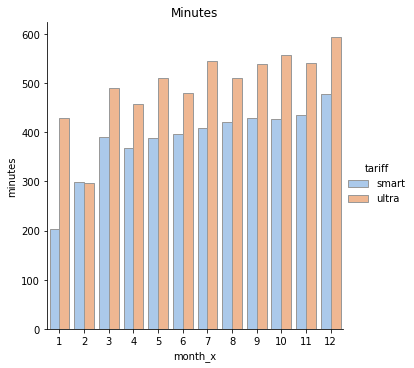

In [72]:
sns.catplot(x="month_x", y='minutes', hue="tariff", kind='bar',
            palette="pastel", edgecolor=".6",
            data=costs, ci = 0).set(title="Minutes")

[Text(0.5, 1.0, 'Minutes')]

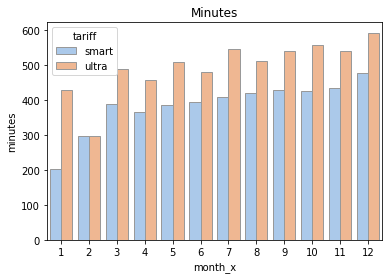

In [73]:
sns.barplot(x="month_x", y='minutes', hue="tariff",
            palette="pastel", edgecolor=".6",
            data=costs, ci = 0).set(title="Minutes")

In [74]:
smart_minutes_var = np.var(costs['minutes'].where(costs['tariff'] == 'smart'), ddof=1)

In [75]:
smart_minutes_var

36219.31578434428

In [76]:
ultra_minutes_var = np.var(costs['minutes'].where(costs['tariff'] == 'ultra'), ddof=1)

In [77]:
ultra_minutes_var


100873.63339730098

*Messages*

In [78]:
monthly_cost_ultra['messages'].describe()

count    12.000000
mean     43.750000
std      12.270623
min      22.000000
25%      33.500000
50%      45.000000
75%      53.000000
max      61.000000
Name: messages, dtype: float64

In [79]:
monthly_cost_smart['messages'].describe()

count    12.000000
mean     31.500000
std       5.213619
min      18.000000
25%      31.750000
50%      34.000000
75%      34.000000
max      36.000000
Name: messages, dtype: float64

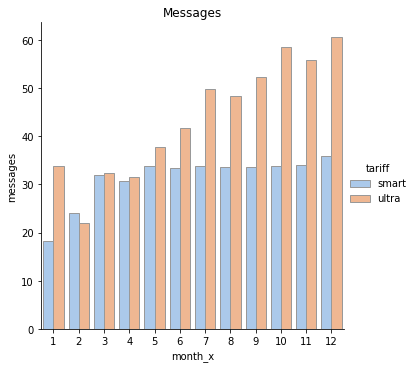

In [80]:
sns.catplot(x="month_x", y='messages', hue="tariff", kind='bar',
            palette="pastel", edgecolor=".6",
            data=costs, ci = 0).set(title="Messages")

In [81]:
ultra_messages_var = np.var(costs['messages'].where(costs['tariff'] == 'ultra'), ddof=1)

In [82]:
ultra_messages_var

2285.2661425446736

In [83]:
smart_messages_var = np.var(costs['messages'].where(costs['tariff'] == 'smart'), ddof=1)

In [84]:
smart_messages_var

796.8129584480083

*Traffic*

In [85]:
monthly_cost_ultra['mb_used'].describe()

count       12.000000
mean     18222.833333
std       2988.536517
min      11787.000000
25%      17375.000000
50%      19301.500000
75%      19869.750000
max      21814.000000
Name: mb_used, dtype: float64

In [86]:
monthly_cost_smart['mb_used'].describe()

count       12.000000
mean     15077.750000
std       2675.003862
min       8524.000000
25%      14712.750000
50%      15820.000000
75%      16668.750000
max      18137.000000
Name: mb_used, dtype: float64

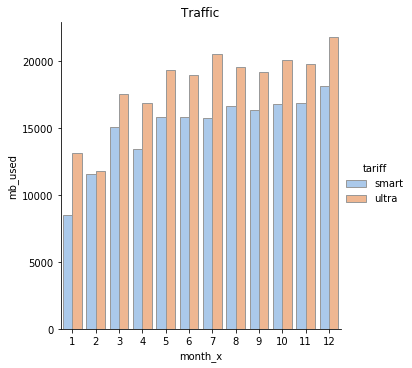

In [87]:
sns.catplot(x="month_x", y='mb_used', hue="tariff", kind='bar',
            palette="pastel", edgecolor=".6",
            data=costs, ci = 0).set(title="Traffic")

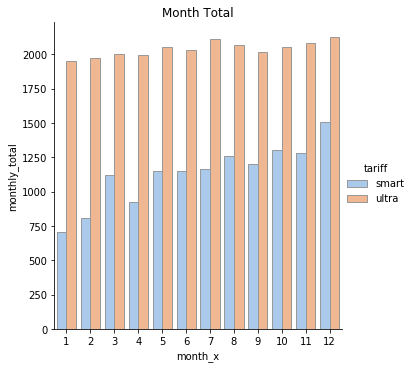

In [88]:
sns.catplot(x="month_x", y='monthly_total', hue="tariff", kind='bar',
            palette="pastel", edgecolor=".6",
            data=costs, ci = 0).set(title="Month Total")

In [89]:
smart_triffic_var = np.var(costs['mb_used'].where(costs['tariff'] == 'smart'), ddof=1)

In [90]:
smart_triffic_var

34545911.12695753

In [91]:
ultra_traffic_var = np.var(costs['mb_used'].where(costs['tariff'] == 'ultra'), ddof=1)

In [92]:
ultra_traffic_var

101935621.04821923

#### Intermediate conclusion
Minutes:

    "Smart" avg = 365
            std = 68
            var = 38
    "Ultra" avg = 468
            std = 73
            var = 106
Messages:

    "Smart" avg = 32
            std = 5
            var = 27
    "Ultra" avg = 44
            std = 12
            var = 151

Traffic

    "Smart" avg = 15059
            std = 2671
            var = 7135499
    "Ultra" avg = 18206
            std = 2986
            var = 8915356

In [ ]:
costs.groupby('tariff').calls.hist()
plt.legend(['smart', 'ultra'])
plt.xlabel('Calls')
plt.ylabel('Amount')
plt.title('Calls')
plt.show()

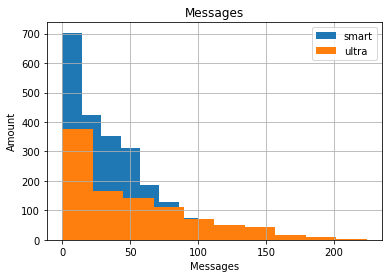

In [94]:
costs.groupby('tariff').messages.hist()
plt.legend(['smart', 'ultra'])
plt.xlabel('Messages')
plt.ylabel('Amount')
plt.title('Messages')
plt.show()

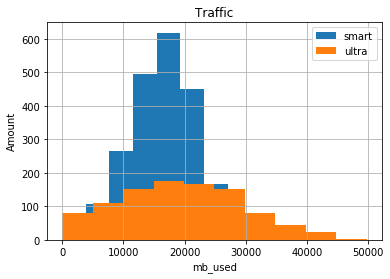

In [95]:
costs.groupby('tariff').mb_used.hist()
plt.legend(['smart', 'ultra'])
plt.xlabel('mb_used')
plt.ylabel('Amount')
plt.title('Traffic')
plt.show()

1. Both users of tariffs 'Smart' and 'Ultra' are not sending a lot of messages, which is normal for today. We more use messangers then SMS.  
2. In tariff 'Smart' we have peaks, but in tariff 'Ultra' peaks are not so cleare. 
3. Also we can think that we have outlier but in this database it can be also a good data. Don't think that we need to delete it.

### Probability <a href = "prob"></a>


*Total Fee*

H(0) - There is no difference between "Smart" and "Ultra" total fee.<br>
H(1) - There is difference in total fee

In [96]:
alpha_1 = .01
alpha_2 = .05

results = st.ttest_ind(
    monthly_cost_smart['monthly_total'],
    monthly_cost_ultra['monthly_total'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha_1):
    print("There is difference between tariffs total fee if alpha 1%")
else:
    print("There is no difference between tariffs total fee if alpha 1%")

p-значение: 3.118836045266985e-12
There is difference between tariffs total fee if alpha 1%


In [97]:
alpha_1 = .01
alpha_2 = .05

smart = costs.query("tariff == 'smart'")['monthly_total']
ultra = costs.query("tariff == 'ultra'")['monthly_total']


print(np.var(smart))
print(np.var(ultra))

results = st.ttest_ind(smart, ultra, equal_var = False)


print('p-значение:', results.pvalue)

if (results.pvalue < alpha_1):
    print("There is difference between tariffs total fee if alpha 1%")
else:
    print("There is no difference between tariffs total fee if alpha 1%")

620179.9912918358
126814.73235177404
p-значение: 8.911718216991379e-296
There is difference between tariffs total fee if alpha 1%


In [98]:
if (results.pvalue < alpha_2):
    print("There is difference between tariffs total_fee if alpha 5%")
else:
    print("There is no difference between tariffs total fee if alpha 5%")

There is difference between tariffs total_fee if alpha 5%


*Cities*

H(0) - There is no difference between income in Moscow and other regions.<br>
H(1) - There is difference in income

In [99]:
alpha_1 = .01
alpha_2 = .05

moscow = costs.query("city == 'Москва'")['monthly_total']
other_cities = costs.query("city == 'Other'")['monthly_total']

print(np.var(moscow))
print(np.var(other_cities))

results = st.ttest_ind(moscow, other_cities, equal_var = False)


print('p-значение:', results.pvalue)

if (results.pvalue < alpha_1):
    print("There is difference between tariffs total fee if alpha 1%")
else:
    print("There is no difference between tariffs total fee if alpha 1%")

546348.9565441002
630259.856461316
p-значение: 0.45489046098064356
There is no difference between tariffs total fee if alpha 1%


In [100]:
if (results.pvalue < alpha_2):
    print("There is difference between tariffs total_fee if alpha 5%")
else:
    print("There is no difference between tariffs total fee if alpha 5%")


There is no difference between tariffs total fee if alpha 5%


#### Intermediate conclusion

Hypnosis that there is no difference between tariff's income is discarded<br>

Hypnosis that there is no difference between tariff's income depending on a region is confirmed.

### Conclusion <a id = "conclusion"></a>


We were provided with five files:

calls.csv - information about calls duration<br>
internet.csv - information about traffic that was used<br>
messages.csv - information about messages that was sent<br>
tariffs.csv - information about tariffs<br> 
users.csv - information about users<br>


We got query of user calls, messages and traffic use in each month.

We count how many each user paid each month. And all income in each month. 

We have that there is deference only between tariffs' income, without difference between regions.

According analyse clients' behavior and the most profitable prepaid plan is:
- for "Megaline"  "Ultra"
- for users "Smart"
